##Importar Librerias

In [ ]:
#Importar Librerias

#Good Stuff
import numpy as np
import scipy as sci
import scipy.integrate

#Animaciones
import mpl_toolkits.mplot3d.axes3d as p3
import matplotlib.animation as animation
from matplotlib import pyplot as plt

#Graficas Interactivas
import pandas as pd
import plotly.express as px
import plotly.io as pio
pio.templates.default = "plotly_dark"


## Solución numérica del problema de 2 cuerpos

In [ ]:
#Valores de Referencia
# G = 6.6740e-11 #m^2/kg s^2
# masa_ref = 1.989e+30 #kg
# dist_ref = 5.326e+12 #m
# velo_ref = 30000 #m/s
# time_ref = 75*365*24*3600 #s 

G = 1 #m^2/kg s^2
masa_ref = 1 #kg
dist_ref = 1 #m
velo_ref = 1 #m/s
time_ref = 1 #s

#Constantes
K1 = G* time_ref*masa_ref/(dist_ref**2 * velo_ref)
K2 = velo_ref * time_ref / dist_ref

In [ ]:
#Condiciones Inciales 
# Esta es la parte que se debe editar para ver diferentes sistemas
# Se pueden editar la masa, la posición y velocidad inicial de ambos cuerpos.

#Masas
m1 = 1.1
m2 = 0.9

#Posiciones Iniciales
r1 = np.array([-0.5, 0, 0],dtype='float64')
r2 = np.array([0.5, 0, 0],dtype='float64')

#Velocidades Iniciales
v1 = np.array([0.05, 0.1, 0],dtype='float64')
v2 = np.array([-0.05, 0, 0.01],dtype='float64')

#Titulo de estas condiciones
titulo = 'ajajaja'

In [ ]:
#Define las ecuaciones
def ecuaciones_2_cuerpos(rvs, t, G, m1, m2):
  r1 = rvs[0:3]
  r2 = rvs[3:6]
  v1 = rvs[6:9]
  v2 = rvs[9:12]

  #Defino la norma
  r = np.linalg.norm(r2 - r1)

  #Ecuaciones para las velocidades
  dv1_dt = K1*m2*(r2-r1)/r**3
  dv2_dt = K1*m1*(r1-r2)/r**3

  #Ecuaciones para las posiciones
  dr1_dt = K2*v1
  dr2_dt = K2*v2

  ds = np.concatenate([dr1_dt, dr2_dt, dv1_dt, dv2_dt])
  return ds


In [ ]:
#Tiempo de integración
tf = 2
pps = 500

#Condiciones Iniciales
condiciones_iniciales = np.array([r1,r2,v1,v2]).flatten()
t = np.linspace(0,tf, tf*pps)

#Calcular la solucion
sol_2_cuerpos = sci.integrate.odeint(ecuaciones_2_cuerpos, condiciones_iniciales, t, args=(G,m1,m2))

r1_sol = sol_2_cuerpos[:,:3]
r2_sol = sol_2_cuerpos[:,3:6]

In [ ]:
#Lo pasamos al sistema en el centro de masa
r_cm = (m1*r1_sol+m2*r2_sol)/(m1+m2)
r1_sol = r1_sol - r_cm
r2_sol = r2_sol - r_cm

In [ ]:
 #Esta celda genera la grafica interactiva usando plotly.
 cuerpos = 2
 l = len(r1_sol) 
 data = np.zeros([l*cuerpos,3])
 data[:l] = r1_sol
 data[l:2*l] = r2_sol

 nombres = np.repeat(np.array([1, 2]), l)
 data = np.concatenate([nombres.reshape(-1,1), data], axis=1)
 dataframe = pd.DataFrame(data, columns=["Cuerpo", "x","y","z"])


fig = px.line_3d(dataframe, x='x',y='y',z='z',color='Cuerpo')

fig.update_layout(scene_aspectmode = 'data')
fig.show()

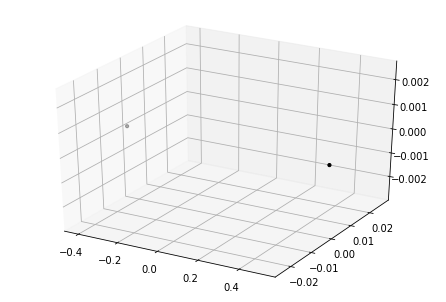

In [ ]:
#Esta celda crea la animacion

def update(j,data,bodies,lines):
  bodies._offsets3d = (data[:, 0, j], data[:, 1, j], data[:, 2, j])
  for i in range(0, 2):
    lines[i].set_data_3d(data[i,:, :j+1])


#Crea la figura
fig = plt.figure()
ax = p3.Axes3D(fig)

# ax.view_init(elev=20, azim=90)    # punto de vista
# ax.dist = 7    # controlar la distancia entre los ejes y la camara

#Acomoda los datos
x1, y1, z1 =  r1_sol[:,0], r1_sol[:,1] , r1_sol[:,2]
x2, y2, z2 = r2_sol[:,0], r2_sol[:,1] , r2_sol[:,2]
r1 = np.array([x1,y1,z1])
r2 = np.array([x2,y2,z2])
data = np.array([r1,r2])
c1, c2 = data

#Define las lineas
line1, = ax.plot(c1[0, 0:3], c1[1, 0:3], c1[2, 0:3],color='b')
line2, = ax.plot(c2[0, 0:3], c2[1, 0:3], c2[2, 0:3],color='r')
lines = np.array([line1,line2])

#Define los cuerpos
bodies = ax.scatter(data[:,0,0],data[:,1,0],data[:,2,0],s=10,c='k')

#Define el rango de los ejes
xmin = np.min([np.min(x1),np.min(x2)])
ymin = np.min([np.min(y1),np.min(y2)])
zmin = np.min([np.min(z1),np.min(z2)])
xmax = np.max([np.max(x1),np.max(x2)])
ymax = np.max([np.max(y1),np.max(y2)])
zmax = np.max([np.max(z1),np.max(z2)])
ax.set_xlim3d(xmin,xmax)
ax.set_ylim3d(ymin,ymax)
ax.set_zlim3d(zmin,zmax)
plt.tick_params(axis='both', which='both', bottom='off', top='off', labelbottom='off', right='off', left='off', labelleft='off')


#Crea y guarda la animación
line_ani = animation.FuncAnimation(fig, update,frames=len(x1), fargs=(data, bodies, lines))
line_ani.save(titulo + '-2cuerpos.mp4', writer='ffmpeg',fps=100)


In [ ]:
# Mostrar video
from IPython.display import HTML
from base64 import b64encode

name = titulo + '-2cuerpos.mp4'
mp4 = open(name,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=800 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

## Solución numérica del problema de los 3 cuerpos

In [ ]:
#Valores de referencia

# G = 6.6740e-11 #m^2/kg s^2
# masa_ref = 1.989e+30 #kg
# dist_ref = 5.326e+12 #m
# velo_ref = 30000 #m/s
# time_ref = 75*365*24*3600 #s


G = 1 #m^2/kg s^2
masa_ref = 1 #kg
dist_ref = 1 #m
velo_ref = 1 #m/s
time_ref = 1 #s

#Constantes
K1 = G* time_ref*masa_ref/(dist_ref**2 * velo_ref)
K2 = velo_ref * time_ref / dist_ref


In [ ]:
#Condiciones Inciales 
# Esta es la parte que se debe editar para ver diferentes sistemas
# Se pueden editar la masa, la posición y velocidad inicial de los tres cuerpos.

#Masas
m1 = 1
m2 = 0.9
m3 = 1.1

#Posiciones iniciales
r1 = np.array([-0.5, 0 , 0],dtype='float64')
r2 = np.array([0.5, 0, 0],dtype='float64')
r3 = np.array([0,1, 0],dtype='float64')

#velocidades iniciales
v1 = np.array([-0.2,0 , 0.02],dtype='float64')
v2 = np.array([0.2, 0, -0.02],dtype='float64')
v3 = np.array([0, -0.01, 0],dtype='float64')

#Titulo de estas condiciones
titulo = 'ejemplo'


In [ ]:
#Define las ecuaciones a resolver
def ecuaciones_3_cuerpos(rvs, t, G, m1, m2, m3):
  r1 = rvs[0:3]
  r2 = rvs[3:6]
  r3 = rvs[6:9]
  v1 = rvs[9:12]
  v2 = rvs[12:15]
  v3 = rvs[15:18]
  
  #Defino las normas
  r12 = np.linalg.norm(r2 - r1)
  r13 = np.linalg.norm(r3 - r1)
  r23 = np.linalg.norm(r3 - r2)

  #Ecuaciones para las velocidades 
  dv1_dt = K1*m2*(r2-r1)/r12**3 + K1*m3*(r3-r1)/r13**3
  dv2_dt = K1*m1*(r1-r2)/r12**3 + K1*m3*(r3-r2)/r23**3
  dv3_dt = K1*m1*(r1-r3)/r13**3 + K1*m2*(r2-r3)/r23**3

  #Ecuaciones para las posiciones
  dr1_dt = K2*v1
  dr2_dt = K2*v2
  dr3_dt = K2*v3

  #Concatenamos todo para ponerlo en el formato del solucionador
  ds = np.concatenate([dr1_dt, dr2_dt, dr3_dt, dv1_dt, dv2_dt, dv3_dt])
  
  return ds


In [ ]:
#Definimos tiempo de integración y puntos por unidad 
tf = 2
pps = 500

#Condiciones iniciales
condiciones_iniciales = np.array([r1,r2,r3,v1,v2,v3]).flatten()
t = np.linspace(0,tf, tf*pps)


#Solucionamos las ecuaciones
sol_3_cuerpos = sci.integrate.odeint(ecuaciones_3_cuerpos, condiciones_iniciales, t, args=(G,m1,m2,m3))

#Separamos la solución de cada cuerpo
r1_sol = sol_3_cuerpos[:,:3]
r2_sol = sol_3_cuerpos[:,3:6]
r3_sol = sol_3_cuerpos[:,6:9]

In [ ]:
#Paso al sistema de centro de masa
r_cm = (m1*r1_sol+m2*r2_sol+m3*r3_sol)/(m1+m2+m3)
r1_sol = r1_sol - r_cm
r2_sol = r2_sol - r_cm
r3_sol = r3_sol - r_cm

In [ ]:
 #Esta celda genera la grafica interactiva usando plotly.
 cuerpos = 3
 l = len(r1_sol) 
 data = np.zeros([l*cuerpos,3])
 data[:l] = r1_sol
 data[l:2*l] = r2_sol
 data[2*l:3*l] = r3_sol

 nombres = np.repeat(np.array([1, 2, 3]), l)
 data = np.concatenate([nombres.reshape(-1,1), data], axis=1)
 dataframe = pd.DataFrame(data, columns=["Cuerpo", "x","y","z"])


fig = px.line_3d(dataframe, x='x',y='y',z='z',color='Cuerpo')

fig.update_layout(scene_aspectmode = 'data')
# fig.write_image(  "aaaa.png")
fig.show()


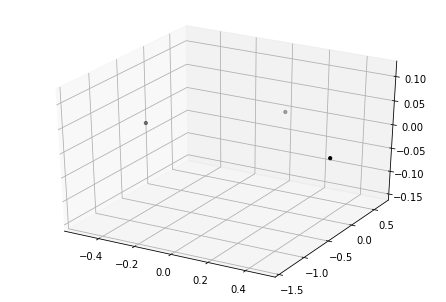

In [ ]:
#Esta celda crea la animacion

def update(j,data,bodies,lines):
  #Actualiza los cuerpos
  bodies._offsets3d = (data[:, 0, j], data[:, 1, j], data[:, 2, j])
  
  #Actualiza las lineas de las conexiones
  #Descomentar si se quieren ver
  # connection01.set_data_3d([data[0,0,j],data[1,0,j]],[data[0,1,j],data[1,1,j]],[data[0,2,j],data[1,2,j]])
  # connection02.set_data_3d([data[0,0,j],data[2,0,j]],[data[0,1,j],data[2,1,j]],[data[0,2,j],data[2,2,j]])
  # connection12.set_data_3d([data[1,0,j],data[2,0,j]],[data[1,1,j],data[2,1,j]],[data[1,2,j],data[2,2,j]])
  
  for i in range(0, 3):
    #Actualiza las lineas
    lines[i].set_data_3d(data[i,:, :j+1])


#Crea la figura
fig = plt.figure()
ax = p3.Axes3D(fig)

#Acomoda los datos
x1, y1, z1 =  r1_sol[:,0], r1_sol[:,1] , r1_sol[:,2]
x2, y2, z2 = r2_sol[:,0], r2_sol[:,1] , r2_sol[:,2]
x3, y3, z3 = r3_sol[:,0], r3_sol[:,1] , r3_sol[:,2]
r1 = np.array([x1,y1,z1])
r2 = np.array([x2,y2,z2])
r3 = np.array([x3,y3,z3])
data = np.array([r1,r2,r3])
c1, c2 , c3 = data

#Define las lineas
line1, = ax.plot(c1[0, 0:3], c1[1, 0:3], c1[2, 0:3],color='b')
line2, = ax.plot(c2[0, 0:3], c2[1, 0:3], c2[2, 0:3],color='r')
line3, = ax.plot(c3[0, 0:3], c3[1, 0:3], c3[2, 0:3],color='g')
lines = np.array([line1,line2,line3])

#Define los cuerpos
bodies = ax.scatter(data[:,0,0],data[:,1,0],data[:,2,0],s=10,c='k')

#Hace las conexiones entre cuerpos
#Se puede descomentar si se quieren observar 
# connection01, =  ax.plot([data[0,0,0],data[1,0,0]],[data[0,1,0],data[1,1,0]],[data[0,2,0],data[1,2,0]], color='m')
# connection02, =  ax.plot([data[0,0,0],data[2,0,0]],[data[0,1,0],data[2,1,0]],[data[0,2,0],data[2,2,0]], color='m')
# connection12, =  ax.plot([data[1,0,0],data[2,0,0]],[data[1,1,0],data[2,1,0]],[data[1,2,0],data[2,2,0]], color='m')

#Define el rango de los ejes
xmin = np.min([np.min(x1),np.min(x2),np.min(x3)])
ymin = np.min([np.min(y1),np.min(y2),np.min(y3)])
zmin = np.min([np.min(z1),np.min(z2),np.min(z3)])
xmax = np.max([np.max(x1),np.max(x2),np.max(x3)])
ymax = np.max([np.max(y1),np.max(y2),np.max(y3)])
zmax = np.max([np.max(z1),np.max(z2),np.max(z3)])
ax.set_xlim3d(xmin,xmax)
ax.set_ylim3d(ymin,ymax)
ax.set_zlim3d(zmin,zmax)

#Quita todo el fondo
# plt.axis('off')


#Crea y guarda la animación
line_ani = animation.FuncAnimation(fig, update,frames=len(x1), fargs=(data, bodies, lines))
line_ani.save(titulo + '-3cuerpos.mp4', writer='ffmpeg',fps=100)



In [ ]:
# Mostrar video
from IPython.display import HTML
from base64 import b64encode

name = titulo + '-3cuerpos.mp4'
mp4 = open(name,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=600 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)